In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
cluster_loop = pd.read_csv("clustermap_loop.csv")
cluster_loop.head()

,Data,LASCA,HiCExplorer,FitHiC,FitHiChIP,Peakachu,MUSTACHE,Chromosight,SIP,cloops,cloops2,HiCCUPs
0,Primary_chr1_10k,1332,1970,6315,3693,2312,2018,951,249,154,76,3890
1,Primary_chr1_5k,2801,2334,6644,770,1953,3749,1426,1442,154,76,3302
2,Primary_chr6_10k,962,1284,4681,3175,1705,1570,614,310,35,62,2367
3,Primary_chr6_5k,1814,1663,5026,952,1633,2490,866,1040,35,62,1878
4,KR_chr1_10k,1503,1471,6315,3678,7607,5844,958,315,0,0,3890


ValueError: could not convert string to float: 'Primary_chr1_10k'

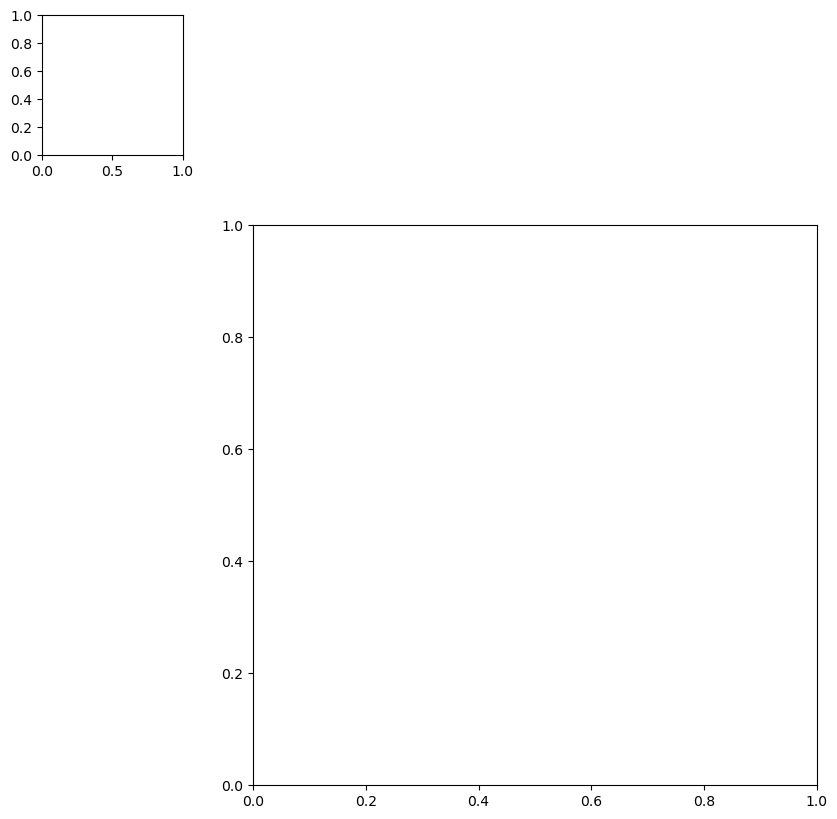

In [26]:
sns.clustermap(cluster_loop, metric="correlation", cmap = "mako")
plt.savefig("loop_clustering.png")

In [21]:
cluster_overview = pd.read_csv("clustermap_overview.csv")
cluster_overview.head()

,LASCA,HiCExplorer,FitHiC,FitHiChIP,Peakachu,MUSTACHE,Chromosight,SIP,cLoops,cLoops2,HiCCUPS
0,62.66,52.26,100.00,58.61,75.59,100.00,30.95,19.00,24.68,35.74,83.38
1,15.58,16.81,100.00,0.00,25.88,38.47,54.87,47.62,2.21,0.89,100.00
2,54.17,61.67,38.33,96.58,86.92,62.50,71.00,98.25,65.00,63.92,98.58
3,20.13,38.78,14.43,29.13,62.33,58.14,29.62,31.05,30.63,18.92,100.00
4,26.64,40.77,7.46,34.85,75.04,78.84,56.63,32.49,18.33,8.14,99.99


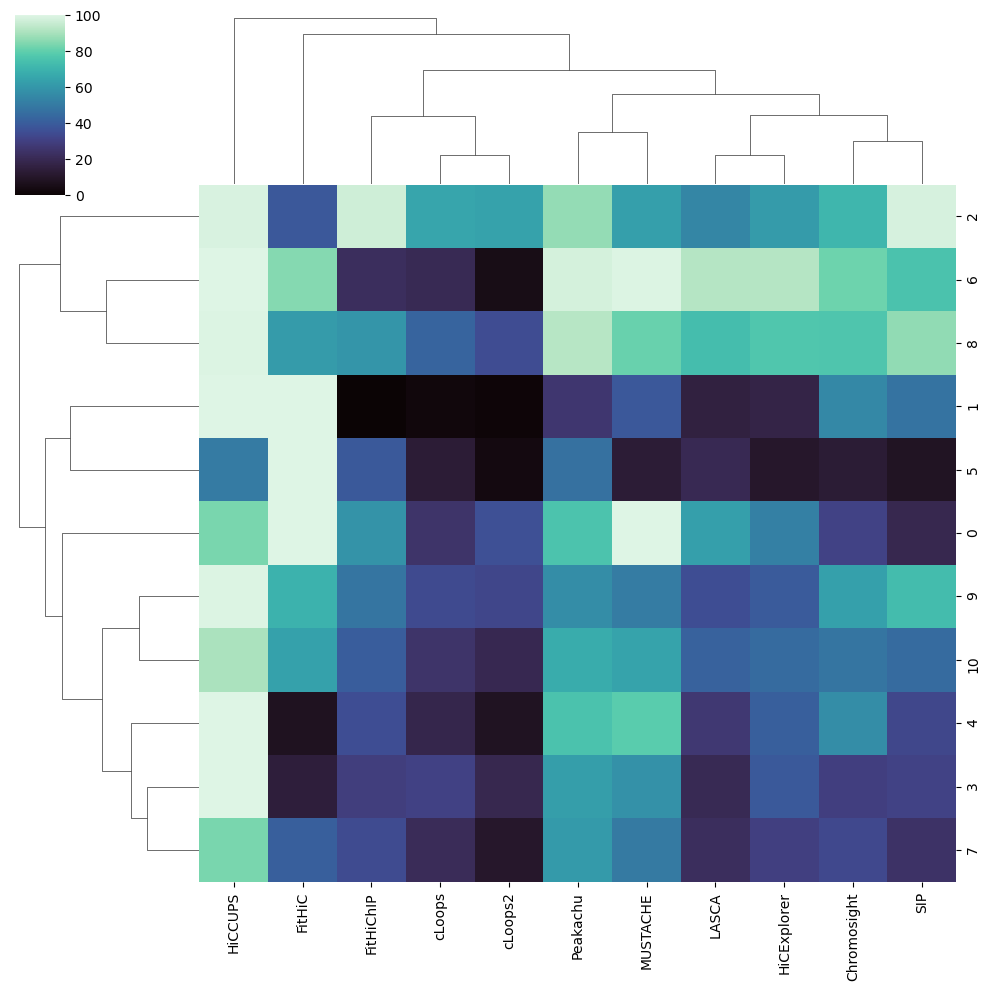

In [22]:
sns.clustermap(cluster_overview, cmap = "mako")
plt.savefig("overview_clustering.png")

In [28]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

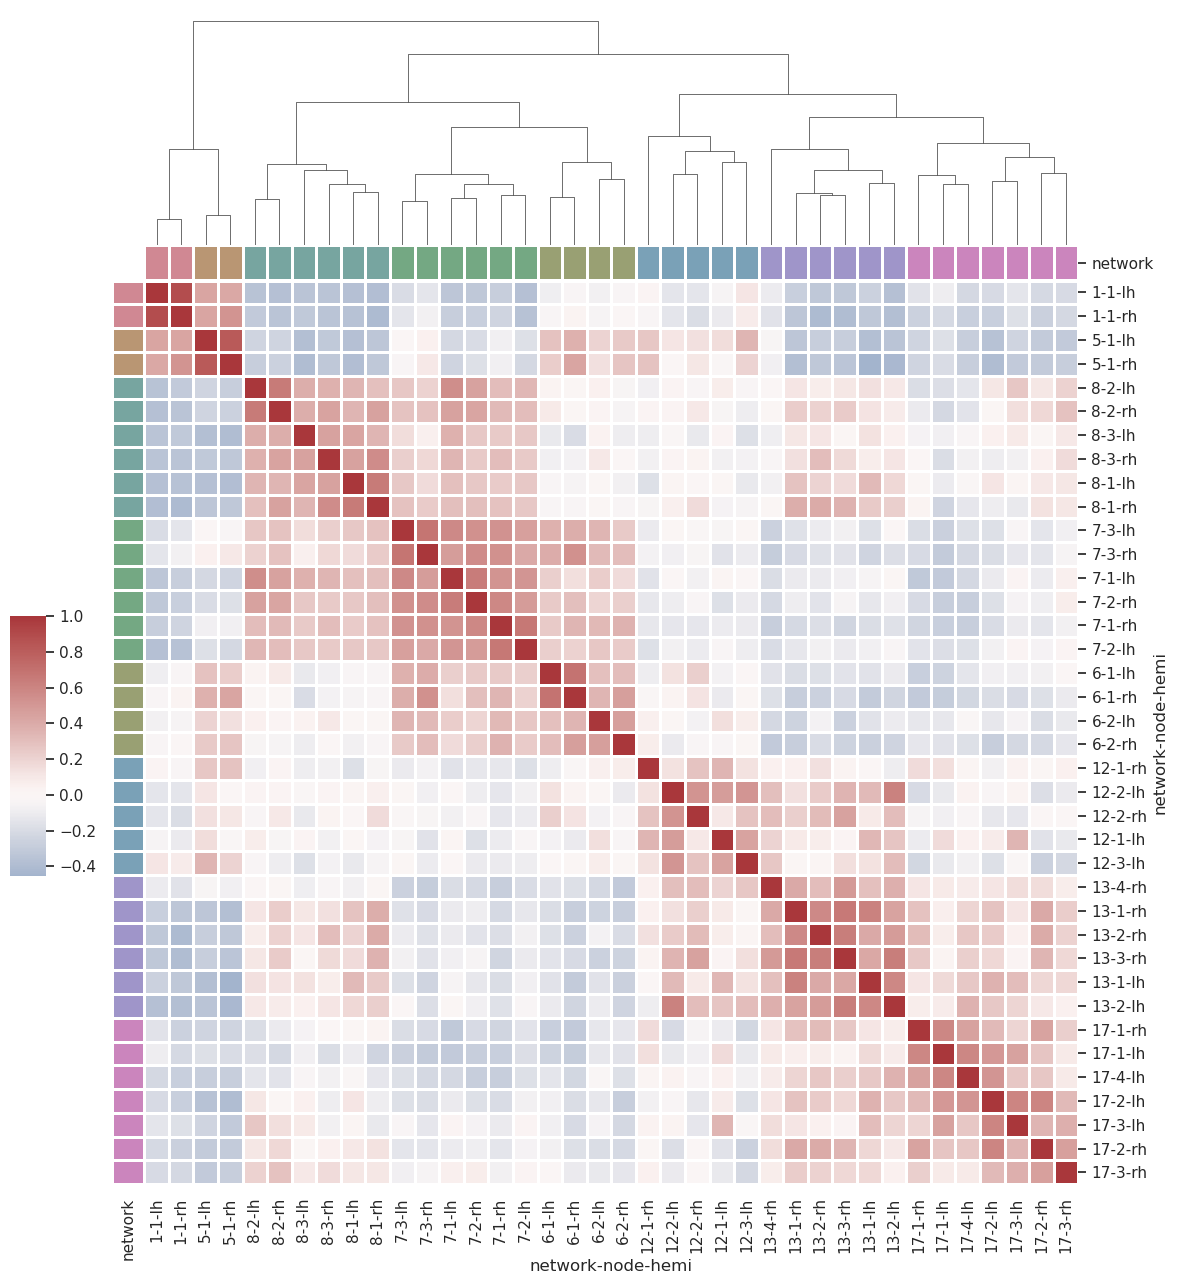

In [27]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()